# A few vizualization attempts and associated data prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pytz
%matplotlib inline

#### Read in JHU and Population data

In [2]:
dfsj = pd.read_csv('../data/processed/covid19-JHU/covid19-JHU.csv')
dfsj['Date'] = pd.to_datetime(dfsj['Date'])
dfsj.reset_index(level=0, inplace=True)
dfsj['ConfirmedPer1M'] = dfsj['PercPopConfirmed']*10000
dfsj['DeathsPer1M'] = dfsj['PercPopDeaths']*10000

dfp = pd.read_csv('../data/raw/population/populations.csv')
dfp.index = dfp.Country.values
dfp.drop(['Country'], axis=1, inplace=True)
dfp.index.rename('Country', inplace=True)

In [3]:
dfsj.head()

,index,Country,Confirmed,Deaths,Recovered,Date,Population,PercPopConfirmed,PercPopDeaths,ConfirmedPer1M,DeathsPer1M
0,0,Afghanistan,1.0,0.0,0.0,2020-02-24,38928346.0,0.000003,0.0,0.025688,0.0
1,1,Afghanistan,1.0,0.0,0.0,2020-02-25,38928346.0,0.000003,0.0,0.025688,0.0
2,2,Afghanistan,1.0,0.0,0.0,2020-02-26,38928346.0,0.000003,0.0,0.025688,0.0
3,3,Afghanistan,1.0,0.0,0.0,2020-02-27,38928346.0,0.000003,0.0,0.025688,0.0
4,4,Afghanistan,1.0,0.0,0.0,2020-02-28,38928346.0,0.000003,0.0,0.025688,0.0


In [4]:
dfp.head()

,Population
Country,
China,1439323776
India,1380004385
US,331002651
Indonesia,273523615
Pakistan,220892340


#### A list of countries to plot

In [5]:
plotlist = ['Italy', 'Spain', 'Germany', 'US', 'France', 'Sweden', 'Switzerland', 'UK']
dfplot = dfsj[dfsj.Country.isin(plotlist)]

## country comparison graphs

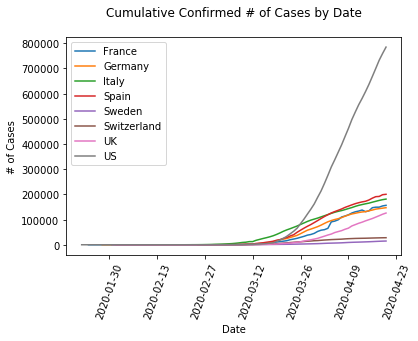

In [6]:
grpd = dfplot.groupby(['Country'])
for name, data in grpd:
    plt.plot('Date', 'Confirmed', data=data.sort_values('Date'), label = name)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Cases')
plt.title('Cumulative Confirmed # of Cases by Date\n')
plt.legend(loc='upper left')

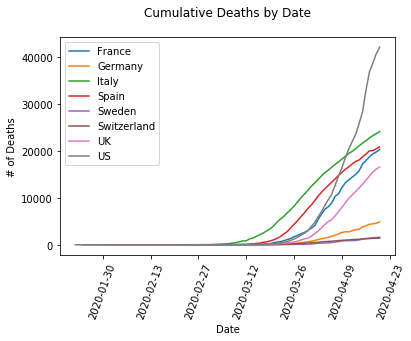

In [7]:
grpd = dfplot.groupby(['Country'])
for name, data in grpd:
    plt.plot('Date', 'Deaths', data=data.sort_values('Date'), label = name)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Deaths')
plt.title('Cumulative Deaths by Date\n')
plt.legend(loc='upper left')

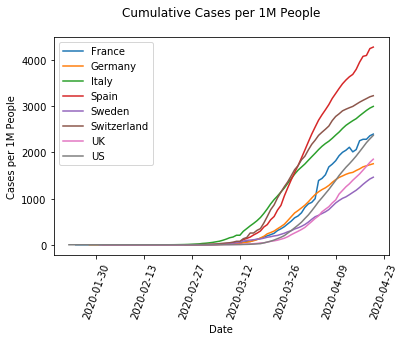

In [8]:
grpd = dfplot.groupby(['Country'])
for name, data in grpd:
    plt.plot('Date', 'ConfirmedPer1M', data=data.sort_values('Date'), label = name)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Cases per 1M People')
plt.title('Cumulative Cases per 1M People\n')
plt.legend(loc='upper left')

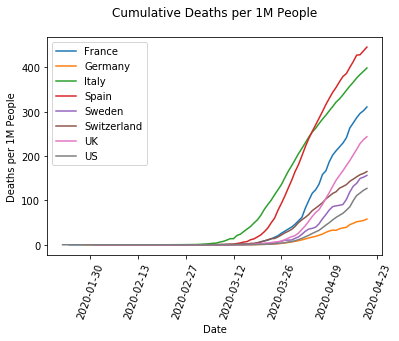

In [9]:
grpd = dfplot.groupby(['Country'])
for name, data in grpd:
    plt.plot('Date', 'DeathsPer1M', data=data.sort_values('Date'), label = name)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Deaths per 1M People')
plt.title('Cumulative Deaths per 1M People\n')
plt.legend(loc='upper left')

#### Align graphs by a starting point

In [10]:
start =20
dfplots = dfplot[dfplot['Deaths'] > start]
grpd = dfplots.groupby(['Country'])

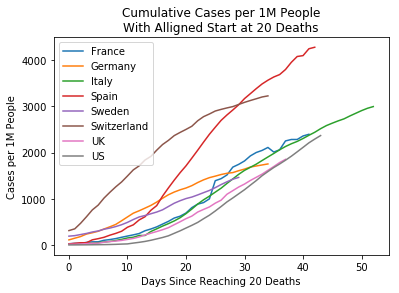

In [11]:
#plt.xticks(rotation=70)
for name, data in grpd:
    plt.plot(data.ConfirmedPer1M.values, label = name)
plt.ylabel('Cases per 1M People')
plt.xlabel('Days Since Reaching ' + str(start) + ' Deaths')
plt.title('Cumulative Cases per 1M People\nWith Alligned Start at ' + str(start) + ' Deaths')
plt.legend()

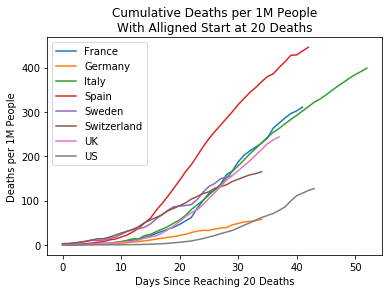

In [12]:
#plt.xticks(rotation=70)
for name, data in grpd:
    plt.plot(data.DeathsPer1M.values, label = name)
plt.ylabel('Deaths per 1M People')
plt.xlabel('Days Since Reaching ' + str(start) + ' Deaths')
plt.title('Cumulative Deaths per 1M People\nWith Alligned Start at ' + str(start) + ' Deaths')
plt.legend()

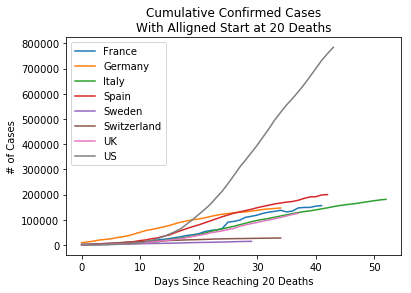

In [13]:
#plt.xticks(rotation=70)
for name, data in grpd:
    plt.plot(data.Confirmed.values, label = name)
plt.ylabel('# of Cases')
plt.xlabel('Days Since Reaching ' + str(start) + ' Deaths')
plt.title('Cumulative Confirmed Cases\nWith Alligned Start at ' + str(start) + ' Deaths')
plt.legend()

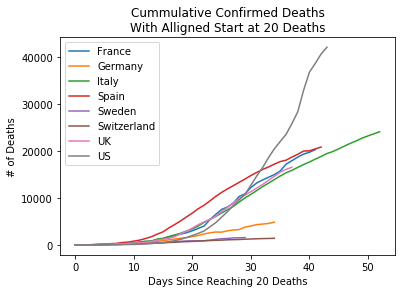

In [14]:
#plt.xticks(rotation=70)
for name, data in grpd:
    plt.plot(data.Deaths.values, label = name)
plt.ylabel('# of Deaths')
plt.xlabel('Days Since Reaching ' + str(start) + ' Deaths')
plt.title('Cummulative Confirmed Deaths\nWith Alligned Start at ' + str(start) + ' Deaths')
plt.legend()

# bring in CDC flu deaths

#### pni is a proxy others have used for deaths in the US due to the common flu 

In [15]:
mort = pd.read_csv('../data/raw/cdcfluview/mortality.csv')

In [16]:
mort.head(1)

,seasonid,baseline,threshold,percent_pni,percent_complete,number_influenza,number_pneumonia,all_deaths,total_pni,weeknumber,geo_description,age_label,week_start,week_end,year_week_num,mmwrid,coverage_area,region_name,callout
0,59,0.053,0.057,0.052,1.0,16,2707,52465,2723,40,National,All,2019-09-29,2019-10-05,40,3014,national,national,Normal levels


In [17]:
mort = mort[['total_pni', 'week_start', 'week_end']]
mort['week_start'] = pd.to_datetime(mort['week_start'])
mort['week_end'] = pd.to_datetime(mort['week_end'])
mort.sort_values('week_end', ascending=True, inplace=True)
mort.head()

,total_pni,week_start,week_end
289,3143,2013-09-29,2013-10-05
290,3147,2013-10-06,2013-10-12
291,3227,2013-10-13,2013-10-19
292,3162,2013-10-20,2013-10-26
293,3283,2013-10-27,2013-11-02


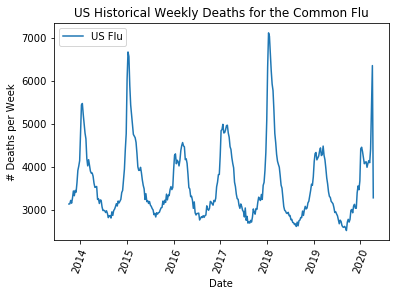

In [18]:
plt.plot('week_end', 'total_pni', data=mort, label = 'US Flu')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# Deaths per Week')
plt.title('US Historical Weekly Deaths for the Common Flu')
plt.legend(loc='upper left')

#### convert weekly deaths to a daily deaths estimate

In [19]:
pni = []
dates = []
for index, row in mort.iterrows():
    i=0
    m = row['total_pni'] / 7
    d = row['week_start'].date()
    while d < row['week_end'].date():
        d = row['week_start'].date() + pd.DateOffset(i)
        dates.append(d)
        pni.append(m)
        i+=1

#### take the average deaths for a day across all previous years to use as a baseline

In [20]:
cols = {'flu_deaths':pni,'Date':dates}
flu = pd.DataFrame(cols)
flu['month_day'] = flu['Date'].astype(str).str.slice(5, 10, 1)

In [21]:
uspop = dfp[dfp.index=='US'].values
x = 1000000*flu['flu_deaths'].values/uspop
x[0]
flu['flu_deaths_per1m'] = x[0]

In [22]:
flu.head(10)

,flu_deaths,Date,month_day,flu_deaths_per1m
0,449.000000,2013-09-29,09-29,1.356485
1,449.000000,2013-09-30,09-30,1.356485
2,449.000000,2013-10-01,10-01,1.356485
3,449.000000,2013-10-02,10-02,1.356485
4,449.000000,2013-10-03,10-03,1.356485
5,449.000000,2013-10-04,10-04,1.356485
6,449.000000,2013-10-05,10-05,1.356485
7,449.571429,2013-10-06,10-06,1.358211
8,449.571429,2013-10-07,10-07,1.358211
9,449.571429,2013-10-08,10-08,1.358211


In [23]:
fluSeason = flu[flu.Date < pd.Timestamp(2019,9,1)]
fluSeason['month'] = fluSeason['Date'].dt.month #used to append back the year
fluSeason = fluSeason.groupby(['month_day']).mean()

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
fluSeason.head()

,flu_deaths,flu_deaths_per1m,month
month_day,,,
01-01,717.428571,2.167441,1
01-02,717.428571,2.167441,1
01-03,725.166667,2.190818,1
01-04,740.095238,2.235919,1
01-05,754.523810,2.279510,1


#### give these averaged numbers the current year so we can graph them against current trends

In [25]:
fluSeason['Date'] = fluSeason.index
fluSeason['Date'][fluSeason.month >= 9] = '2019-' + fluSeason.Date
fluSeason['Date'][fluSeason.month < 9] = '2020-' + fluSeason.Date
fluSeason['Date'] = pd.to_datetime(fluSeason['Date'])
fluSeason.sort_values('Date', inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


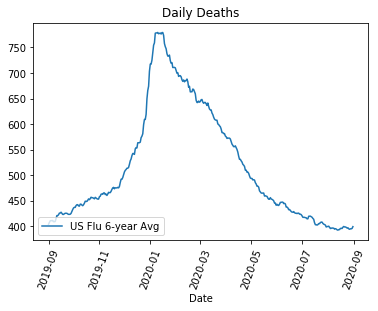

In [26]:
plt.plot('Date', 'flu_deaths', data=fluSeason, label = 'US Flu 6-year Avg')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.title('Daily Deaths')
plt.legend(loc='lower left')

### Get COVID-19 daily stats from the cumulative JHU numbers 

### US COVID

In [27]:
uscovid = dfsj[dfsj.Country=='US'].sort_values('Date', ascending=True)
uspop = dfp[dfp.index=='US'].values

In [28]:
covid = []     
i=0
for index, row in uscovid.iterrows():
#     print(uscovid.iloc[i]['Deaths'])
    if i==0:
        d = row['Deaths'] 
    else:
        d = row['Deaths'] - uscovid.iloc[i-1]['Deaths']
    i+=1
#     print(d)
    covid.append(d)
uscovid['dailyDeaths'] = covid

In [29]:
x = 1000000*uscovid['dailyDeaths'].values/uspop

In [30]:
uscovid['dailyDeaths_per1m'] = x[0]

In [31]:
uscovid.sort_values('Date', ascending=False).head(7)

,index,Country,Confirmed,Deaths,Recovered,Date,Population,PercPopConfirmed,PercPopDeaths,ConfirmedPer1M,DeathsPer1M,dailyDeaths,dailyDeaths_per1m
8328,8328,US,784326.0,42094.0,72329.0,2020-04-20,331002651.0,0.236955,0.012717,2369.545977,127.171187,1433.0,4.329270
8327,8327,US,759086.0,40661.0,70337.0,2020-04-19,331002651.0,0.229329,0.012284,2293.292811,122.841916,1997.0,6.033184
8326,8326,US,732197.0,38664.0,64840.0,2020-04-18,331002651.0,0.221206,0.011681,2212.057812,116.808732,1891.0,5.712945
8325,8325,US,699706.0,36773.0,58545.0,2020-04-17,331002651.0,0.211390,0.011110,2113.898478,111.095787,3857.0,11.652475
8324,8324,US,667801.0,32916.0,54703.0,2020-04-16,331002651.0,0.201751,0.009944,2017.509521,99.443312,4591.0,13.869980
8323,8323,US,636350.0,28325.0,52096.0,2020-04-15,331002651.0,0.192249,0.008557,1922.492156,85.573333,2494.0,7.534683
8322,8322,US,607670.0,25831.0,47763.0,2020-04-14,331002651.0,0.183585,0.007804,1835.846324,78.038650,2303.0,6.957648


### Italy COVID

In [32]:
italycovid = dfsj[dfsj.Country=='Italy'].sort_values('Date', ascending=True)
italypop = dfp[dfp.index=='Italy'].values

In [33]:
covid = []     
i=0
for index, row in italycovid.iterrows():
#     print(uscovid.iloc[i]['Deaths'])
    if i==0:
        d = row['Deaths'] 
    else:
        d = row['Deaths'] - italycovid.iloc[i-1]['Deaths']
    i+=1
#     print(d)
    covid.append(d)
italycovid['dailyDeaths'] = covid

In [34]:
x = 1000000*italycovid['dailyDeaths'].values/italypop

In [35]:
italycovid['dailyDeaths_per1m'] = x[0]
italycovid.sort_values('Date', ascending=False).head(7)

,index,Country,Confirmed,Deaths,Recovered,Date,Population,PercPopConfirmed,PercPopDeaths,ConfirmedPer1M,DeathsPer1M,dailyDeaths,dailyDeaths_per1m
4048,4048,Italy,181228.0,24114.0,48877.0,2020-04-20,60461826.0,0.299740,0.039883,2997.395414,398.830164,454.0,7.508870
4047,4047,Italy,178972.0,23660.0,47055.0,2020-04-19,60461826.0,0.296008,0.039132,2960.082615,391.321294,433.0,7.161544
4046,4046,Italy,175925.0,23227.0,44927.0,2020-04-18,60461826.0,0.290969,0.038416,2909.687180,384.159751,482.0,7.971972
4045,4045,Italy,172434.0,22745.0,42727.0,2020-04-17,60461826.0,0.285195,0.037619,2851.948269,376.187778,575.0,9.510133
4044,4044,Italy,168941.0,22170.0,40164.0,2020-04-16,60461826.0,0.279418,0.036668,2794.176279,366.677645,525.0,8.683165
4043,4043,Italy,165155.0,21645.0,38092.0,2020-04-15,60461826.0,0.273156,0.035799,2731.558256,357.994481,578.0,9.559751
4042,4042,Italy,162488.0,21067.0,37130.0,2020-04-14,60461826.0,0.268745,0.034843,2687.447779,348.434730,602.0,9.956696


### Spain COVID

In [36]:
spaincovid = dfsj[dfsj.Country=='Spain'].sort_values('Date', ascending=True)
spainpop = dfp[dfp.index=='Spain'].values

In [37]:
covid = []     
i=0
for index, row in spaincovid.iterrows():
#     print(uscovid.iloc[i]['Deaths'])
    if i==0:
        d = row['Deaths'] 
    else:
        d = row['Deaths'] - spaincovid.iloc[i-1]['Deaths']
    i+=1
#     print(d)
    covid.append(d)
spaincovid['dailyDeaths'] = covid

In [38]:
x = 1000000*spaincovid['dailyDeaths'].values/spainpop

In [39]:
spaincovid['dailyDeaths_per1m'] = x[0]
spaincovid.sort_values('Date', ascending=False).head(7)

,index,Country,Confirmed,Deaths,Recovered,Date,Population,PercPopConfirmed,PercPopDeaths,ConfirmedPer1M,DeathsPer1M,dailyDeaths,dailyDeaths_per1m
7409,7409,Spain,200210.0,20852.0,80587.0,2020-04-20,46754778.0,0.428213,0.044599,4282.129198,445.986504,399.0,8.533887
7408,7408,Spain,198674.0,20453.0,77357.0,2020-04-19,46754778.0,0.424928,0.043745,4249.276940,437.452617,410.0,8.769157
7407,7407,Spain,191726.0,20043.0,74797.0,2020-04-18,46754778.0,0.410067,0.042868,4100.671807,428.683460,41.0,0.876916
7406,7406,Spain,190839.0,20002.0,74797.0,2020-04-17,46754778.0,0.408170,0.042781,4081.700484,427.806544,687.0,14.693685
7405,7405,Spain,184948.0,19315.0,74797.0,2020-04-16,46754778.0,0.395570,0.041311,3955.702666,413.112859,607.0,12.982630
7404,7404,Spain,177644.0,18708.0,70853.0,2020-04-15,46754778.0,0.379948,0.040013,3799.483338,400.130228,652.0,13.945099
7403,7403,Spain,172541.0,18056.0,67504.0,2020-04-14,46754778.0,0.369034,0.038619,3690.339413,386.185130,300.0,6.416457


### China COVID

In [40]:
chinacovid = dfsj[dfsj.Country=='China'].sort_values('Date', ascending=True)
chinapop = dfp[dfp.index=='China'].values

#### delete china zero reporting days

In [41]:
chinacovid[chinacovid.Deaths == 0]

,index,Country,Confirmed,Deaths,Recovered,Date,Population,PercPopConfirmed,PercPopDeaths,ConfirmedPer1M,DeathsPer1M
1725,1725,China,0.0,0.0,0.0,2020-03-11,1.439324e+09,0.0,0.0,0.0,0.0
1727,1727,China,0.0,0.0,0.0,2020-03-12,1.439324e+09,0.0,0.0,0.0,0.0


In [42]:
chinacovid.drop(chinacovid[chinacovid.Deaths == 0].index, inplace=True)

In [43]:
chinacovid[(chinacovid.Date <= pd.Timestamp(2020,3,13)) & \
           (chinacovid.Date >= pd.Timestamp(2020,3,10))]

,index,Country,Confirmed,Deaths,Recovered,Date,Population,PercPopConfirmed,PercPopDeaths,ConfirmedPer1M,DeathsPer1M
1723,1723,China,80757.0,3136.0,60106.0,2020-03-10,1.439324e+09,0.005611,0.000218,56.107598,2.178801
1724,1724,China,80921.0,3161.0,61644.0,2020-03-11,1.439324e+09,0.005622,0.000220,56.221541,2.196170
1726,1726,China,80932.0,3172.0,62901.0,2020-03-12,1.439324e+09,0.005623,0.000220,56.229183,2.203813
1728,1728,China,80945.0,3180.0,64196.0,2020-03-13,1.439324e+09,0.005624,0.000221,56.238215,2.209371


In [44]:
covid = []     
i=0
for index, row in chinacovid.iterrows():
    if i==0:
        d = row['Deaths'] 
    else:
        d = row['Deaths'] - chinacovid.iloc[i-1]['Deaths']
    i+=1
#     print(d)
    covid.append(d)
chinacovid['dailyDeaths'] = covid

In [45]:
x = 1000000*chinacovid['dailyDeaths'].values/chinapop

In [46]:
chinacovid['dailyDeaths_per1m'] = x[0]
chinacovid.sort_values('Date', ascending=False).head(7)

,index,Country,Confirmed,Deaths,Recovered,Date,Population,PercPopConfirmed,PercPopDeaths,ConfirmedPer1M,DeathsPer1M,dailyDeaths,dailyDeaths_per1m
1766,1766,China,83817.0,4636.0,77745.0,2020-04-20,1.439324e+09,0.005823,0.000322,58.233596,3.220957,0.0,0.000000
1765,1765,China,83805.0,4636.0,77690.0,2020-04-19,1.439324e+09,0.005823,0.000322,58.225259,3.220957,0.0,0.000000
1764,1764,China,83787.0,4636.0,77614.0,2020-04-18,1.439324e+09,0.005821,0.000322,58.212753,3.220957,0.0,0.000000
1763,1763,China,83760.0,4636.0,77552.0,2020-04-17,1.439324e+09,0.005819,0.000322,58.193995,3.220957,1290.0,0.896254
1762,1762,China,83403.0,3346.0,78401.0,2020-04-16,1.439324e+09,0.005795,0.000232,57.945961,2.324703,0.0,0.000000
1761,1761,China,83356.0,3346.0,78311.0,2020-04-15,1.439324e+09,0.005791,0.000232,57.913307,2.324703,1.0,0.000695
1760,1760,China,83306.0,3345.0,78200.0,2020-04-14,1.439324e+09,0.005788,0.000232,57.878569,2.324008,0.0,0.000000


#### Many experts are concluding based on graphs like these and other information that China's data are not accurate. I leave them out of further comparisons in this notebook.

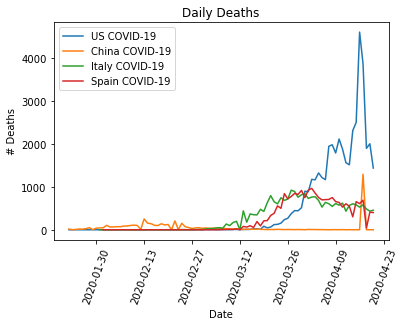

In [47]:
plt.plot('Date', 'dailyDeaths', data=uscovid, label = 'US COVID-19')
plt.plot('Date', 'dailyDeaths', data=chinacovid, label = 'China COVID-19')
plt.plot('Date', 'dailyDeaths', data=italycovid, label = 'Italy COVID-19')
plt.plot('Date', 'dailyDeaths', data=spaincovid, label = 'Spain COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# Deaths')
plt.title('Daily Deaths')
plt.legend(loc='upper left')

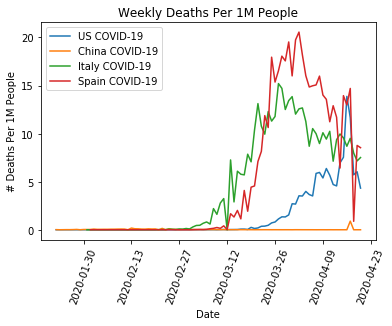

In [48]:
plt.plot('Date', 'dailyDeaths_per1m', data=uscovid, label = 'US COVID-19')
plt.plot('Date', 'dailyDeaths_per1m', data=chinacovid, label = 'China COVID-19')
plt.plot('Date', 'dailyDeaths_per1m', data=italycovid, label = 'Italy COVID-19')
plt.plot('Date', 'dailyDeaths_per1m', data=spaincovid, label = 'Spain COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# Deaths Per 1M People')
plt.title('Weekly Deaths Per 1M People')
plt.legend(loc='upper left')

## compare covid19 to the regular flu in the US

#### get weekly deaths from daily numbers 

In [49]:
uscovid['Week'] = pd.to_datetime(uscovid['Date']) - pd.to_timedelta(7, unit='d')

#get sums of sun to sat
#the date to label the weekly total will be the sat before the count starts
uscovidwk = uscovid.groupby(['Country', pd.Grouper(key='Week', freq='W-SAT')])['dailyDeaths'] \
.sum().reset_index().sort_values('Week')

uscovidwk.rename(columns={'dailyDeaths': 'weeklyDeaths'}, inplace=True)

#add one day so the week lable starts on Sun
uscovidwk['Week'] = uscovidwk['Week'] + pd.to_timedelta(1, unit='d')

#drop tail if in a partial week
last_sunday = least_recent_date = uscovidwk['Week'].max()
uscovidwk.drop(uscovidwk[uscovidwk.Week >= pd.Timestamp(last_sunday)].index, inplace=True)
uscovidwk

,Country,Week,weeklyDeaths
0,US,2020-01-19,0.0
1,US,2020-01-26,0.0
2,US,2020-02-02,0.0
3,US,2020-02-09,0.0
4,US,2020-02-16,0.0
5,US,2020-02-23,1.0
6,US,2020-03-01,16.0
7,US,2020-03-08,37.0
8,US,2020-03-15,253.0
9,US,2020-03-22,1719.0


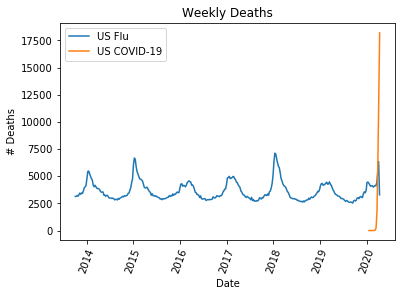

In [68]:
plt.plot('week_end', 'total_pni', data=mort, label = 'US Flu')
plt.plot('Week', 'weeklyDeaths', data=uscovidwk, label = 'US COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# Deaths')
plt.title('Weekly Deaths')
plt.legend(loc='upper left')

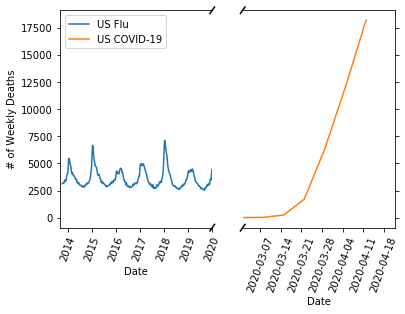

In [69]:
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot('week_end', 'total_pni', data=mort, label = 'US Flu')
ax.plot('Week', 'weeklyDeaths', data=uscovidwk, label = 'US COVID-19')
ax2.plot('week_end', 'total_pni', data=mort[mort.week_end < pd.Timestamp(2020,1,1)], label = 'US Flu')
ax2.plot('Week', 'weeklyDeaths', data=uscovidwk, label = 'US COVID-19')

ax.set_xlim(datetime.date(2013, 9, 1),datetime.date(2020, 1, 11))
ax2.set_xlim(datetime.date(2020, 3, 1),datetime.datetime.now(pytz.timezone('US/Pacific')))

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.tick_right()
ax.set_ylabel("# of Weekly Deaths")
ax.set_xlabel("Date")
ax2.set_xlabel("Date")
ax.tick_params(axis='x', rotation=70)
ax2.tick_params(axis='x', rotation=70)
ax.legend(loc='upper left')


d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

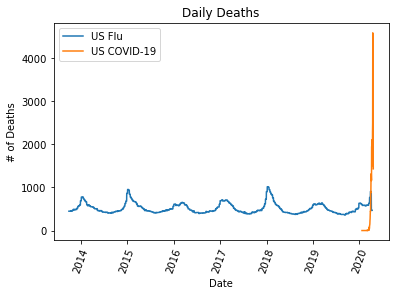

In [70]:
plt.plot('Date', 'flu_deaths', data=flu, label = 'US Flu')
plt.plot('Date', 'dailyDeaths', data=uscovid, label = 'US COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Deaths')
plt.title('Daily Deaths')
plt.legend(loc='upper left')

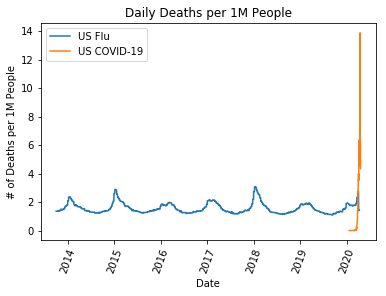

In [71]:
plt.plot('Date', 'flu_deaths_per1m', data=flu, label = 'US Flu')
plt.plot('Date', 'dailyDeaths_per1m', data=uscovid, label = 'US COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Deaths per 1M People')
plt.title('Daily Deaths per 1M People')
plt.legend(loc='upper left')

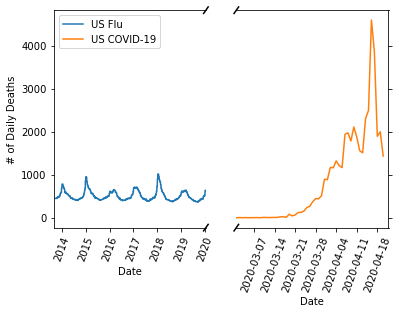

In [72]:
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot('Date', 'flu_deaths', data=flu, label = 'US Flu')
ax.plot('Date', 'dailyDeaths', data=uscovid, label = 'US COVID-19')
ax2.plot('Date', 'flu_deaths', data=flu[flu.Date < pd.Timestamp(2020,1,1)], label = 'US Flu')
ax2.plot('Date', 'dailyDeaths', data=uscovid, label = 'US COVID-19')

ax.set_xlim(datetime.date(2013, 9, 1),datetime.date(2020, 1, 11))
ax2.set_xlim(datetime.date(2020, 3, 1),datetime.datetime.now(pytz.timezone('US/Pacific')))

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.tick_right()
ax.set_ylabel("# of Daily Deaths")
ax.set_xlabel("Date")
ax2.set_xlabel("Date")
ax.tick_params(axis='x', rotation=70)
ax2.tick_params(axis='x', rotation=70)
ax.legend(loc='upper left')


d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

#### I think this next graph is informative. We can't trust # of cases as a measure of the severity as testing details vary around the world. Deaths is probably the most reliable metric and thus the best measure of severity. Overlaying COVID-19 deaths with expected flu deaths and flu deaths to date for this season gives a clear picture of the impact of COVID-19. Getting expected flu deaths and up to date current season flu deaths for non-US countries is challenging. The CDC does a really good job of tracking this information.

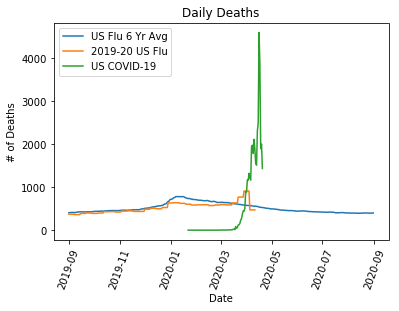

In [73]:
plt.plot('Date', 'flu_deaths', data=fluSeason, label = 'US Flu 6 Yr Avg')
plt.plot('Date', 'flu_deaths', data=flu[flu.Date >= pd.Timestamp(2019, 9, 1)], label = '2019-20 US Flu')
plt.plot('Date', 'dailyDeaths', data=uscovid, label = 'US COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Deaths')
plt.title('Daily Deaths')
plt.legend(loc='upper left')

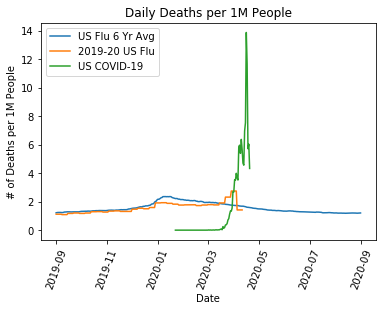

In [74]:
plt.plot('Date', 'flu_deaths_per1m', data=fluSeason, label = 'US Flu 6 Yr Avg')
plt.plot('Date', 'flu_deaths_per1m', data=flu[flu.Date >= pd.Timestamp(2019, 9, 1)], label = '2019-20 US Flu')
plt.plot('Date', 'dailyDeaths_per1m', data=uscovid, label = 'US COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Deaths per 1M People')
plt.title('Daily Deaths per 1M People')
plt.legend(loc='upper left')

### Compare COVID-19 to the common flu in Italy. Estimated from graphs in an often-sited academic study
Investigating the impact of influenza on excess mortality in all ages in Italy during recent seasons (2013/14–2016/17 seasons)
https://www.sciencedirect.com/science/article/pii/S1201971219303285

#### get weekly deaths from daily numbers 

In [57]:
italycovid['Week'] = pd.to_datetime(italycovid['Date']) - pd.to_timedelta(7, unit='d')

#get sums of sun to sat
#the week date will be the sat before the count starts
italycovidwk = italycovid.groupby(['Country', pd.Grouper(key='Week', freq='W-SAT')])['dailyDeaths'] \
.sum().reset_index().sort_values('Week')

italycovidwk.rename(columns={'dailyDeaths': 'weeklyDeaths'}, inplace=True)

#add one day so the week starts on Sun
italycovidwk['Week'] = italycovidwk['Week'] + pd.to_timedelta(1, unit='d')

#drop tail if in a partial week
last_sunday = least_recent_date = italycovidwk['Week'].max()
# print(last_sunday)
italycovidwk.drop(italycovidwk[italycovidwk.Week >= pd.Timestamp(last_sunday)].index, inplace=True)

In [58]:
x = 1000000*italycovidwk['weeklyDeaths'].values/italypop
italycovidwk['weeklyDeaths_per1m'] = x[0]
italycovidwk

,Country,Week,weeklyDeaths,weeklyDeaths_per1m
0,Italy,2020-01-26,0.0,0.000000
1,Italy,2020-02-02,0.0,0.000000
2,Italy,2020-02-09,0.0,0.000000
3,Italy,2020-02-16,2.0,0.033079
4,Italy,2020-02-23,27.0,0.446563
5,Italy,2020-03-01,204.0,3.374030
6,Italy,2020-03-08,1208.0,19.979549
7,Italy,2020-03-15,3384.0,55.969199
8,Italy,2020-03-22,5198.0,85.971601
9,Italy,2020-03-29,5339.0,88.303651


#### Very rough estimation from graphs in the academic study. Raw data was not provided. Only flu season spikes were estimated and plotted against the date of Jan 1st for that flu season to provide a visual comparison. This particular model for estimating flu-related deaths put summer month flu deaths at zero. The US summer month death estimates are around 0.78 deaths per 1M people a week. The death impact of the common flu in Italy is historically more severe than in the US so this zero estimate is probably underestimated. The US baseline could be used, if desired, for more accurate comparisons.

In [59]:
italy_baseline = pd.read_csv('../data/raw/italy/italy_flu_baseline.csv')
italy_baseline['Date'] = pd.to_datetime(italy_baseline['date'])
# us baseline minimum. the italy study didn't calculate a minimum.
italy_baseline.weeklyDeaths_per100k = italy_baseline.weeklyDeaths_per100k #+ 0.78
# convert to weekly per 1M
italy_baseline['weeklyDeaths_per1m'] = italy_baseline.weeklyDeaths_per100k * 10
# convert to daily per 1M
italy_baseline['dailyDeaths_per1m'] = italy_baseline.weeklyDeaths_per100k * 10 / 7
italy_baseline['month_day'] = italy_baseline['date'].astype(str).str.slice(0, 3, 1)
italy_baseline_avg = italy_baseline.groupby(['month_day']).mean()
italy_baseline_avg

,weeklyDeaths_per100k,weeklyDeaths_per1m,dailyDeaths_per1m
month_day,,,
1/1,4.5,45.0,6.428571
9/1,0.0,0.0,0.000000


In [60]:
italy_baseline_avg = italy_baseline_avg.append(italy_baseline_avg[italy_baseline_avg.index == '9/1'], \
                                               ignore_index=True)
italy_baseline_avg['Date'] = pd.to_datetime(['1/1/2020', '9/1/2019', '9/1/2020'])
italy_baseline_avg.sort_values(['Date'], inplace=True)
italy_baseline_avg

,weeklyDeaths_per100k,weeklyDeaths_per1m,dailyDeaths_per1m,Date
1,0.0,0.0,0.000000,2019-09-01
0,4.5,45.0,6.428571,2020-01-01
2,0.0,0.0,0.000000,2020-09-01


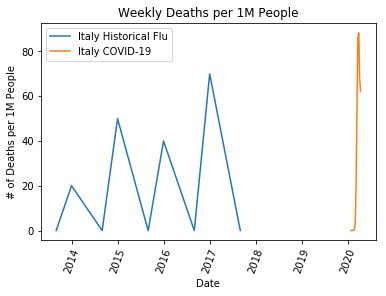

In [61]:
plt.plot('Date', 'weeklyDeaths_per1m', data=italy_baseline, label = 'Italy Historical Flu')
plt.plot('Week', 'weeklyDeaths_per1m', data=italycovidwk, label = 'Italy COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Deaths per 1M People')
plt.title('Weekly Deaths per 1M People')
plt.legend(loc='upper left')

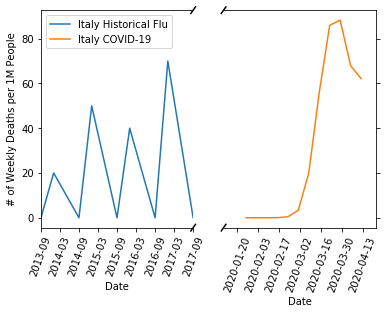

In [62]:
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot('Date', 'weeklyDeaths_per1m', data=italy_baseline, label = 'Italy Historical Flu')
ax.plot('Week', 'weeklyDeaths_per1m', data=italycovidwk, label = 'Italy COVID-19')
ax2.plot('Date', 'weeklyDeaths_per1m', data=italy_baseline, label = 'Italy Historical Flu')
ax2.plot('Week', 'weeklyDeaths_per1m', data=italycovidwk, label = 'Italy COVID-19')

ax.set_xlim(datetime.date(2013, 9, 1),datetime.date(2017, 9, 1))
ax2.set_xlim(datetime.date(2020, 1, 11),datetime.datetime.now(pytz.timezone('US/Pacific')))

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.tick_right()
ax.set_ylabel("# of Weekly Deaths per 1M People")
ax.set_xlabel("Date")
ax2.set_xlabel("Date")
ax.tick_params(axis='x', rotation=70)
ax2.tick_params(axis='x', rotation=70)
ax.legend(loc='upper left')


d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

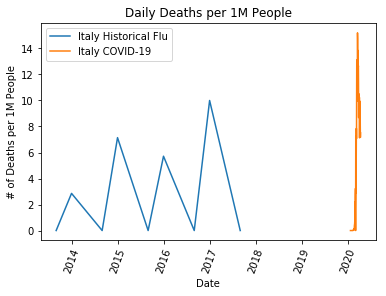

In [63]:
plt.plot('Date', 'dailyDeaths_per1m', data=italy_baseline, label = 'Italy Historical Flu')
plt.plot('Week', 'dailyDeaths_per1m', data=italycovid, label = 'Italy COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Deaths per 1M People')
plt.title('Daily Deaths per 1M People')
plt.legend(loc='upper left')

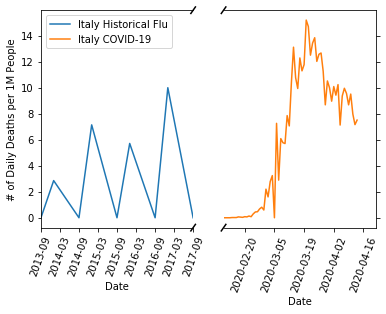

In [64]:
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot('Date', 'dailyDeaths_per1m', data=italy_baseline, label = 'Italy Historical Flu')
ax.plot('Week', 'dailyDeaths_per1m', data=italycovid, label = 'Italy COVID-19')
ax2.plot('Date', 'dailyDeaths_per1m', data=italy_baseline, label = 'Italy Historical Flu')
ax2.plot('Week', 'dailyDeaths_per1m', data=italycovid, label = 'Italy COVID-19')

ax.set_xlim(datetime.date(2013, 9, 1),datetime.date(2017, 9, 1))
ax2.set_xlim(datetime.date(2020, 2, 10),datetime.datetime.now(pytz.timezone('US/Pacific')))

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.tick_right()
ax.set_ylabel("# of Daily Deaths per 1M People")
ax.set_xlabel("Date")
ax2.set_xlabel("Date")
ax.tick_params(axis='x', rotation=70)
ax2.tick_params(axis='x', rotation=70)
ax.legend(loc='upper left')


d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

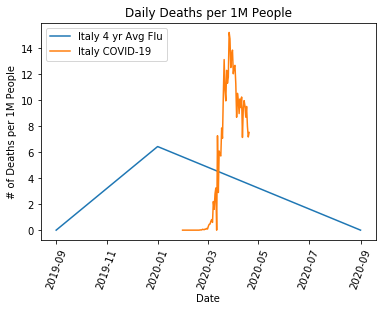

In [65]:
plt.plot('Date', 'dailyDeaths_per1m', data=italy_baseline_avg, label = 'Italy 4 yr Avg Flu')
plt.plot('Date', 'dailyDeaths_per1m', data=italycovid, label = 'Italy COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Deaths per 1M People')
plt.title('Daily Deaths per 1M People')
plt.legend(loc='upper left')

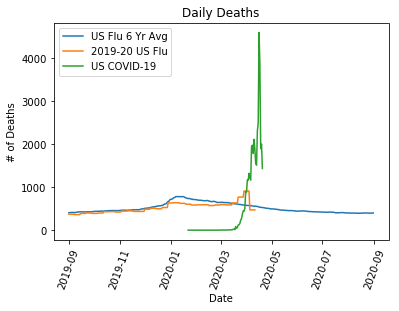

In [75]:
#replot this so the graphs of interest are together at the bottom of the notebook
plt.plot('Date', 'flu_deaths', data=fluSeason, label = 'US Flu 6 Yr Avg')
plt.plot('Date', 'flu_deaths', data=flu[flu.Date >= pd.Timestamp(2019, 9, 1)], label = '2019-20 US Flu')
plt.plot('Date', 'dailyDeaths', data=uscovid, label = 'US COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Deaths')
plt.title('Daily Deaths')
plt.legend(loc='upper left')

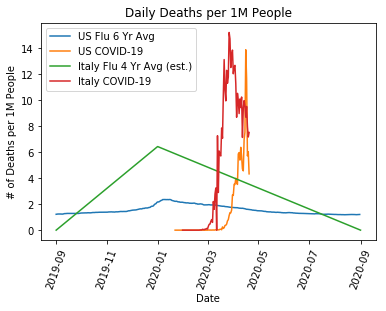

In [67]:
plt.plot('Date', 'flu_deaths_per1m', data=fluSeason, label = 'US Flu 6 Yr Avg')
# plt.plot('Date', 'flu_deaths_per1m', data=flu[flu.Date >= pd.Timestamp(2019, 9, 1)], label = '2019-20 US Flu')
plt.plot('Date', 'dailyDeaths_per1m', data=uscovid, label = 'US COVID-19')
plt.plot('Date', 'dailyDeaths_per1m', data=italy_baseline_avg, label = 'Italy Flu 4 Yr Avg (est.)')
plt.plot('Date', 'dailyDeaths_per1m', data=italycovid, label = 'Italy COVID-19')
# plt.plot('Date', 'dailyDeaths_per1m', data=chinacovid, label = 'China COVID-19')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('# of Deaths per 1M People')
plt.title('Daily Deaths per 1M People')
plt.legend(loc='upper left')